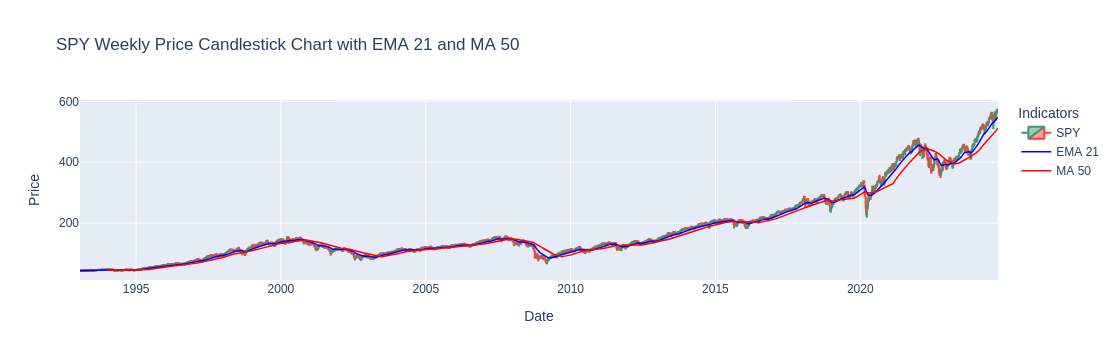

In [22]:
import pandas as pd
import plotly.graph_objects as go

# Read the CSV file from your local file system
df = pd.read_csv('/home/legend/Documents/analytics/BATS_SPY_1W_homework.csv')

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Calculate EMA 21
df['EMA21'] = df['close'].ewm(span=21, adjust=False).mean()

# Calculate MA 50
df['MA50'] = df['close'].rolling(window=50).mean()

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['time'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='SPY')])

# Add EMA 21
fig.add_trace(go.Scatter(x=df['time'], y=df['EMA21'], 
                         line=dict(color='blue', width=1.5), 
                         name='EMA 21'))

# Add MA 50
fig.add_trace(go.Scatter(x=df['time'], y=df['MA50'], 
                         line=dict(color='red', width=1.5), 
                         name='MA 50'))

# Update layout
fig.update_layout(
    title='SPY Weekly Price Candlestick Chart with EMA 21 and MA 50',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    legend_title='Indicators'
)

# Show the plot
fig.show()

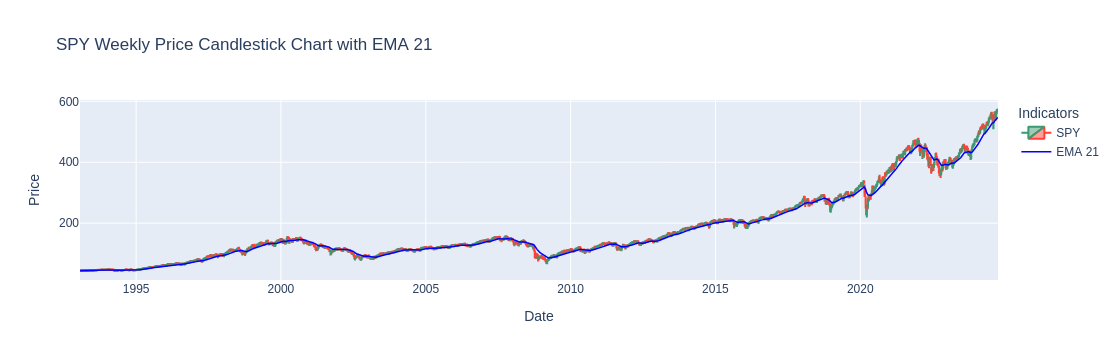

In [24]:
# Calculate EMA 21
df['EMA21'] = df['close'].ewm(span=21, adjust=False).mean()

# Create the candlestick chart with EMA 21
fig = go.Figure(data=[go.Candlestick(x=df['time'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='SPY')])

# Add EMA 21
fig.add_trace(go.Scatter(x=df['time'], y=df['EMA21'], 
                         line=dict(color='blue', width=1.5), 
                         name='EMA 21'))

# Update layout
fig.update_layout(
    title='SPY Weekly Price Candlestick Chart with EMA 21',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    legend_title='Indicators'
)

# Show the plot
fig.show()

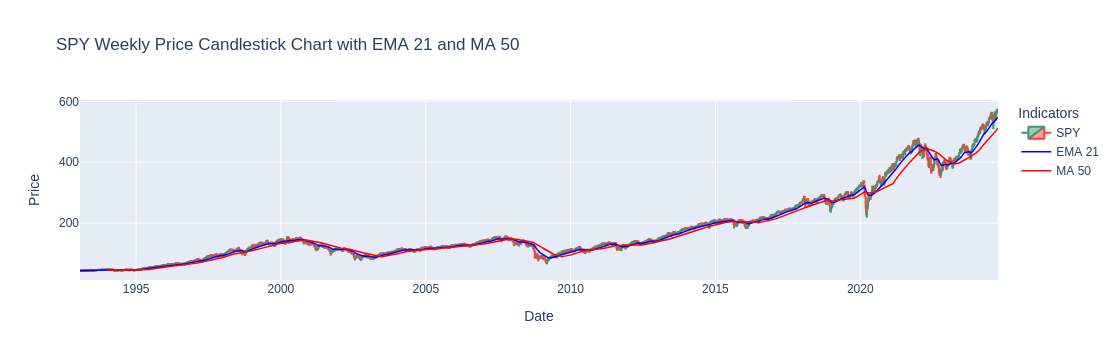

In [26]:
# Calculate MA 50
df['MA50'] = df['close'].rolling(window=50).mean()

# Create the candlestick chart with EMA 21 and MA 50
fig = go.Figure(data=[go.Candlestick(x=df['time'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='SPY')])

# Add EMA 21
fig.add_trace(go.Scatter(x=df['time'], y=df['EMA21'], 
                         line=dict(color='blue', width=1.5), 
                         name='EMA 21'))

# Add MA 50
fig.add_trace(go.Scatter(x=df['time'], y=df['MA50'], 
                         line=dict(color='red', width=1.5), 
                         name='MA 50'))

# Update layout
fig.update_layout(
    title='SPY Weekly Price Candlestick Chart with EMA 21 and MA 50',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    legend_title='Indicators'
)

# Show the plot
fig.show()

In [28]:
# After calculating MA50 and EMA21
df['Signal'] = np.where(df['MA50'] > df['EMA21'], 1, 0)  # 1 for buy, 0 for sell
df['Signal_Shift'] = df['Signal'].shift(1)
df['Crossover'] = df['Signal'] - df['Signal_Shift']

In [30]:
# Initialize lists to store trade information
enter_times = []
exit_times = []
enter_prices = []
exit_prices = []

# Iterate through the dataframe to identify trades
in_position = False
for i, row in df.iterrows():
    if not in_position and row['Crossover'] == 1:  # Buy signal
        enter_times.append(row['time'])
        enter_prices.append(row['close'])
        in_position = True
    elif in_position and row['Crossover'] == -1:  # Sell signal
        exit_times.append(row['time'])
        exit_prices.append(row['close'])
        in_position = False

# If still in position at the end, exit at the last available price
if in_position:
    exit_times.append(df['time'].iloc[-1])
    exit_prices.append(df['close'].iloc[-1])

In [32]:
# Create trades dataframe
trades_df = pd.DataFrame({
    'enter_time': enter_times,
    'exit_time': exit_times,
    'enter_price': enter_prices,
    'exit_price': exit_prices
})

# Calculate PnL
trades_df['pnl'] = (trades_df['exit_price'] / trades_df['enter_price']) - 1

# Display the trades
print(trades_df)

# Calculate and display overall strategy performance
total_return = (trades_df['pnl'] + 1).prod() - 1
print(f"\nTotal Return: {total_return:.2%}")
print(f"Number of Trades: {len(trades_df)}")

            enter_time           exit_time  enter_price  exit_price       pnl
0  1994-04-25 13:30:00 1994-10-10 13:30:00     45.09375    47.04687  0.043312
1  1994-12-12 14:30:00 1994-12-19 14:30:00     45.75000    46.06250  0.006831
2  1994-12-26 14:30:00 1995-01-02 14:30:00     45.56250    46.04687  0.010631
3  2000-10-23 13:30:00 2003-05-19 13:30:00    139.28125    93.75999 -0.326830
4  2004-10-18 13:30:00 2004-11-01 14:30:00    109.99001   117.28000  0.066279
5  2008-01-07 14:30:00 2009-08-03 13:30:00    140.14999   101.20200 -0.277902
6  2010-08-09 13:30:00 2010-10-04 13:30:00    108.31000   116.53751  0.075963
7  2011-08-22 13:30:00 2012-02-06 14:30:00    117.97000   134.36099  0.138942
8  2015-09-08 13:30:00 2016-05-09 13:30:00    196.74000   204.76000  0.040764
9  2018-12-10 14:30:00 2019-04-08 13:30:00    260.47000   290.16000  0.113986
10 2020-03-23 13:30:00 2020-07-13 13:30:00    253.42000   321.72000  0.269513
11 2022-04-25 13:30:00 2023-03-20 13:30:00    412.00000   395.75